# Data Cleaning in Python — Exercise

**Course:** Intro to Data Mining  
**Dataset:** Heart Failure Prediction dataset (loaded from a public URL — no file downloads needed!)  

---


# YOUR TURN: Practice Exercise

Now apply the same data cleaning pipeline from the Titanic exercise to a **new dataset**: the **Heart Failure Prediction** dataset.

This dataset combines 5 heart disease databases (918 patients total) and contains medical information about patients and whether or not they have heart disease. It has **text columns that need encoding**, potential outliers, and some tricky data quality issues — perfect for practicing everything we just learned.

**Your tasks** (follow the same steps from above):

1. Load the data and take a first look
2. Understand the data types and structure
3. Get descriptive statistics
4. Check for duplicates
5. Handle missing values (decide: drop column, drop row, or impute?)
6. Encode any categorical (`object`) columns
7. Detect and handle outliers
8. Scale the numerical features

The starter code below loads the dataset for you. The rest is up to you!

> **Hints:** Pay close attention to `.describe()` — not all missing values show up as NaN! Also, this dataset was made by combining multiple hospital databases, so check for duplicates.

### About the Heart Failure Prediction Dataset

| Column | Description | Type |
|--------|-------------|------|
| Age | Age in years | Numerical |
| Sex | M = Male, F = Female | Categorical |
| ChestPainType | TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic | Categorical |
| RestingBP | Resting blood pressure (mm Hg) | Numerical |
| Cholesterol | Serum cholesterol (mg/dl) | Numerical |
| FastingBS | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Numerical |
| RestingECG | Normal, ST = ST-T wave abnormality, LVH = left ventricular hypertrophy | Categorical |
| MaxHR | Maximum heart rate achieved | Numerical |
| ExerciseAngina | Y = Yes, N = No | Categorical |
| Oldpeak | ST depression induced by exercise | Numerical |
| ST_Slope | Up = upsloping, Flat = flat, Down = downsloping | Categorical |
| HeartDisease | 1 = heart disease, 0 = no heart disease (TARGET) | Numerical |

### Step 1: Load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The Heart Failure Prediction dataset — loaded from a public GitHub URL
# (Originally from Kaggle, combining 5 UCI heart disease databases)
url = 'https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv'

heart = pd.read_csv(url)

print(f'Dataset shape: {heart.shape[0]} rows x {heart.shape[1]} columns')
heart.head()

Dataset shape: 918 rows x 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Step 2: Check data types and structure

Use `.info()` to see the data types and count non-null values.

In [4]:
# YOUR CODE HERE
# Hint: heart.info()
heart.info()
print("\nColumn names:\n", heart.columns.tolist())
print("\nData types:\n", heart.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Column names:
 ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Data types:
 Age                

### Step 3: Descriptive statistics

Use `.describe()`. Look for anything surprising in the min, max, or mean values.

In [5]:
# YOUR CODE HERE
# Hint: heart.describe()
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Step 4: Check for duplicates

How many duplicate rows are there? If any, remove them.

In [6]:
# YOUR CODE HERE
# Hint: heart.duplicated().sum()
# To remove: heart = heart.drop_duplicates()
dup_count = heart.duplicated().sum()
print("Duplicate rows:", dup_count)

heart = heart.drop_duplicates()

dup_count_after = heart.duplicated().sum()
print("Duplicates remaining:", dup_count_after)

Duplicate rows: 0
Duplicates remaining: 0


### Step 5: Handle missing values

Check the percentage of missing values per column. Then decide what to do:
- Drop columns that are mostly missing
- Drop rows if very few are missing
- Impute (fill) with mean or median if a moderate amount is missing

In [7]:
# YOUR CODE HERE
# Step 1: Find missing value percentages
# Hint: (heart.isnull().sum() / len(heart)) * 100
for col in ["RestingBP", "Cholesterol"]:
    if col in heart.columns:
        heart.loc[heart[col] == 0, col] = np.nan

# Step 2: Decide and apply your strategy for each column with missing values
missing_pct = (heart.isnull().sum() / len(heart)) * 100 # creates a list showing % of missing values per column
print("Missing % by column:\n", missing_pct[missing_pct > 0].sort_values(ascending=False))


drop_cols = missing_pct[missing_pct > 30].index #Drop columns with > 30% missing
heart = heart.drop(columns=drop_cols)

num_cols = heart.select_dtypes(include=np.number).columns #seperate numeric columns
cat_cols = heart.select_dtypes(include="object").columns #seperate categorical columns

for c in num_cols:
    heart[c] = heart[c].fillna(heart[c].median()) #replace missing values with median

for c in cat_cols:
    heart[c] = heart[c].fillna(heart[c].mode()[0]) #replace missing values with mode

print("\nTotal missing after cleaning:", heart.isnull().sum().sum())

Missing % by column:
 Cholesterol    18.736383
RestingBP       0.108932
dtype: float64

Total missing after cleaning: 0


### Step 6: Encode categorical variables

Check if any columns are `object` type. If so, decide whether to use label encoding or one-hot encoding.

Hint: Look at `.info()` output — how many unique values does each `object` column have?

In [8]:
# YOUR CODE HERE
# Hint: Check for object columns with:
# heart.select_dtypes(include='object').columns
obj_cols = heart.select_dtypes(include='object').columns
print("Object columns:", obj_cols.tolist())

# For 2 categories: heart['col'] = heart['col'].map({'val1': 0, 'val2': 1})
for col in obj_cols:
    if heart[col].nunique() == 2:
        vals = heart[col].unique()
        heart[col] = heart[col].map({vals[0]: 0, vals[1]: 1})
# For 3+ categories: heart = pd.get_dummies(heart, columns=['col'], drop_first=True)
else:
        heart = pd.get_dummies(heart, columns=[col], drop_first=True)
# Think about which columns have 2 categories vs. 3+ categories


Object columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


### Step 7: Detect and handle outliers

Pick 2-3 numerical columns (e.g., `trestbps`, `chol`, `thalach`). Create box plots and use the IQR method.

Remember: think about whether outliers are real data or errors before removing them!

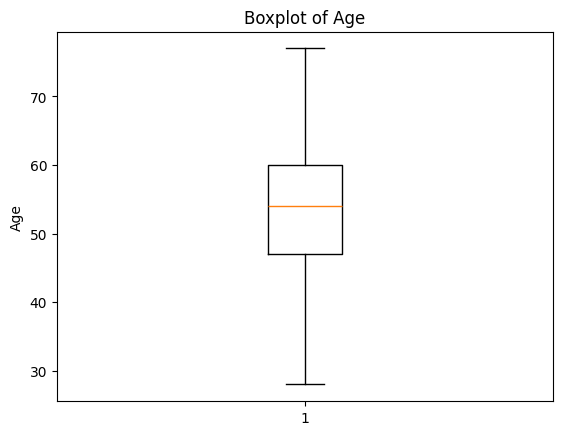

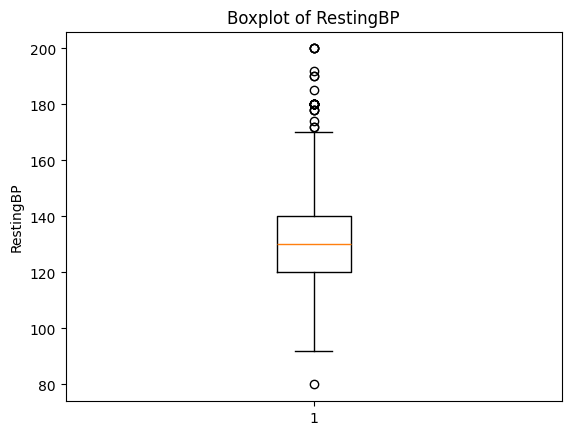

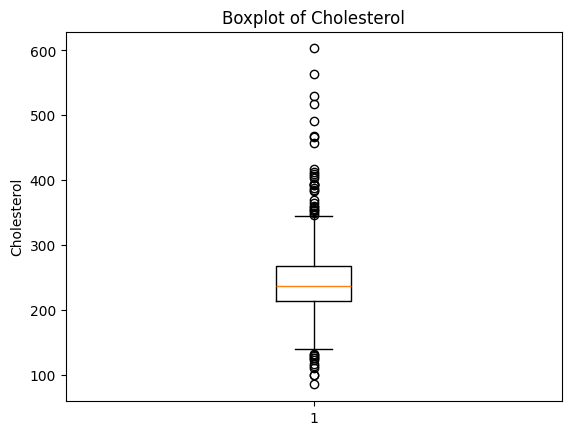

Age: 0 outliers detected
RestingBP: 27 outliers detected
Cholesterol: 41 outliers detected


In [11]:
# YOUR CODE HERE
# Hint: You can reuse the detect_outliers_iqr function from above
# Then create box plots with plt.boxplot()
import matplotlib.pyplot as plt
cols = ['Age', 'RestingBP', 'Cholesterol']

#create box plots
for col in cols:
    plt.figure()
    plt.boxplot(heart[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

#detect outliers IQR method
for col in cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = heart[col].quantile(0.25)
    Q3 = heart[col].quantile(0.75)

    # Compute IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = heart[(heart[col] < lower_bound) | (heart[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers detected")



### Step 8: Scale the numerical features

Apply Min-Max scaling to the numerical columns (not the target column).

In [12]:
# YOUR CODE HERE
# Hint: Follow the same pattern from Section 8 of the tutorial


### Reflection Questions

After completing the exercise, answer these questions (add a text cell or answer here):

1. How did the Heart Disease dataset compare to the Titanic dataset in terms of data quality? <br>The Heart Disease dataset has less missing values, which makes it better for analysis.
2. Which missing value strategy did you use, and why? <br>I handled missing values by filling numerical columns with the median and categorical columns with the mode. The median is less sensitive to extreme values (outliers), making it a reliable choice for numerical data, while the mode preserves the most common category for categorical variables.
3. Did you find any outliers? Did you remove them? Why or why not? <br> Outliers were detected using box plots and the IQR method. No outliers were found in Age column. Some outliers were found in numerical columns such as cholesterol and resting blood pressure. However, since this is a medical dataset, extreme values can represent real patient conditions rather than errors, so I chose to keep them, since that could be valuable information.
4. If you were building a model to predict heart disease, which columns do you think would be most important? <br> If building a model to predict heart disease, important features would likely include age, cholesterol, resting blood pressure, maximum heart rate achieved, and chest pain type. These variables are directly related to heart health and are commonly used in medical diagnosis. Additionally, factors such as sex and exercise-induced angina may also play a significant role.

---
*Great work! You now have hands-on experience with a complete data cleaning pipeline.* Dr. Thompson